# Initialization

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the dataset
df = pd.read_csv('insurance.txt')
df.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


## Function to normalize dataset
### normalize_dataset function normalizes the dataset by using the formula
## $X_{normalized} = \frac {X - min(X_i)} {max(X_i) - min(X_i)}$

In [3]:
def normalize_dataset(dataset):

    # normalize_coeff stores max and min of every column in dataset for denormalization
    normalize_coeff = {col: {'max': dataset[col].max(), 'min': dataset[col].min()} for col in dataset.columns}

    # normal_df is the normalized dataframe
    normal_df = (dataset - dataset.min()) / (dataset.max() - dataset.min())

    return pd.DataFrame(normal_df), normalize_coeff

In [4]:
normal_df, normalize_coeff = normalize_dataset(df)

# Inserting bias column in dataframe
normal_df.insert(0, 'bias', [1] * len(normal_df))

normal_df.head()

,bias,age,bmi,children,charges
0,1,0.021739,0.321227,0.0,0.251611
1,1,0.000000,0.479150,0.2,0.009636
2,1,0.217391,0.458434,0.6,0.053115
3,1,0.326087,0.181464,0.0,0.333010
4,1,0.304348,0.347592,0.0,0.043816


## Function to shuffle the dataset and return $X_{train}, Y_{train}, X_{test}, Y_{test}$ matrices 

In [5]:
from math import ceil
def shuffle(dataframe, ratio, target):
    
    # Getting list of columns for X matrix
    columns = list(dataframe.columns)
    columns.remove(target)
    
    # Getting the max index for training set
    train_len = ceil(len(dataframe) * ratio)
    
    # Shuffling the dataset
    sf = dataframe.sample(frac = 1)
    
    # Dividing X and Y matrices
    X = sf[columns]
    Y = sf[target]
    
    # Generating train, validation and test sets
    X_train = X.iloc[:train_len].to_numpy().reshape((-1, len(columns)))
    X_test = X.iloc[train_len:].to_numpy().reshape((-1, len(columns)))
    
    Y_train = Y.iloc[:train_len].to_numpy().reshape((-1, 1))
    Y_test = Y.iloc[train_len:].to_numpy().reshape((-1, 1))
    
    return X_train, Y_train, X_test, Y_test

## Function to initialize weights

In [6]:
def initialize_weights(X):
    num_features = X.shape[1]
    W = np.zeros((num_features, 1))
    return W

## Function to predict the results

In [7]:
def predict(W, X):
    predictions = X @ W         # '@' performs matrix multiplication
    return predictions

## Function to normalize a value

In [8]:
def normalize(value, name):
    nc = normalize_coeff[name]
    out = (value - nc['min']) / (nc['max'] - nc['min'])
    return out

## Function to denormalize a value

In [9]:
def denormalize(value, name):
    nc = normalize_coeff[name]
    out = value * (nc['max'] - nc['min']) + nc['min']
    return out

## Functions to calculate Error and Accuracy
### Metric used for error -> MSE
## $ MSE = \frac {\sum_{i=1}^{m}{(y_i - \hat y_i)^2}} {2m} $

In [10]:
def calculate_error(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    sq_err = np.sum((y - y_hat) ** 2)
    mse = sq_err / (2 * len(y))
    return mse

### Metric used for accuracy -> $ R^2 $
## $ R^2 = 1- \frac {2 \times MSE} {Var(Y)} $

In [11]:
def calculate_accuracy(y, y_hat):
    y = y.flatten()
    y_hat = y_hat.flatten()
    mse = calculate_error(y, y_hat)
    var_y = np.var(y)
    rMSE = 2 * mse / var_y
    R2 = 1 - rMSE
    return R2

# Building Normal Equation Model
## Function to generate weight matrix W using normal equation
### $ W = (X^TX)^{-1}X^TY $

In [12]:
def get_weight_by_equations(X, Y):
    W = np.linalg.inv(X.T @ X) @ X.T @ Y    # '@' performs matrix multiplication
    return W

## Generating the model 20 times with different train-test split

In [13]:
W_normal = {}
train_accuracy_normal = {}
test_accuracy_normal = {}
train_cost_normal = {}
test_cost_normal = {}

for i in range(1, 21):
    X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
    W_normal[i] = get_weight_by_equations(X_train, Y_train)
    train_predictions = predict(W_normal[i], X_train)
    test_predictions = predict(W_normal[i], X_test)
    train_accuracy_normal[i] = calculate_accuracy(Y_train, train_predictions)
    test_accuracy_normal[i] = calculate_accuracy(Y_test, test_predictions)
    train_cost_normal[i] = calculate_error(Y_train, train_predictions)
    test_cost_normal[i] = calculate_error(Y_test, test_predictions)

## Analyzing the models
### Analyzing costs

In [14]:
train_mean_cost_normal = np.mean(list(train_cost_normal.values()))
train_var_cost_normal = np.var(list(train_cost_normal.values()))
train_max_cost_normal = np.max(list(train_cost_normal.values()))
train_min_cost_normal = np.min(list(train_cost_normal.values()))

test_mean_cost_normal = np.mean(list(test_cost_normal.values()))
test_var_cost_normal = np.var(list(test_cost_normal.values()))
test_max_cost_normal = np.max(list(test_cost_normal.values()))
test_min_cost_normal = np.min(list(test_cost_normal.values()))

print(f'Mean train cost = {train_mean_cost_normal}')
print(f'Variance train cost = {train_var_cost_normal}')
print(f'Max train cost = {train_max_cost_normal}')
print(f'Min train cost = {train_min_cost_normal}')
print()
print(f'Mean test cost = {test_mean_cost_normal}')
print(f'Variance test cost = {test_var_cost_normal}')
print(f'Max test cost = {test_max_cost_normal}')
print(f'Min test cost = {test_min_cost_normal}')

Mean train cost = 0.016419052655788614
Variance train cost = 2.6282887573388944e-07
Max train cost = 0.01746043420339122
Min train cost = 0.01574315704080053

Mean test cost = 0.016499243504193222
Variance test cost = 1.4042380911475966e-06
Max test cost = 0.018182659367771095
Min test cost = 0.01414711146758796


### Analyzing accuracies

In [15]:
train_mean_accuracy_normal = np.mean(list(train_accuracy_normal.values()))
train_var_accuracy_normal = np.var(list(train_accuracy_normal.values()))
train_max_accuracy_normal = np.max(list(train_accuracy_normal.values()))
train_min_accuracy_normal = np.min(list(train_accuracy_normal.values()))

test_mean_accuracy_normal = np.mean(list(test_accuracy_normal.values()))
test_var_accuracy_normal = np.var(list(test_accuracy_normal.values()))
test_max_accuracy_normal = np.max(list(test_accuracy_normal.values()))
test_min_accuracy_normal = np.min(list(test_accuracy_normal.values()))

print(f'Mean train accuracy = {train_mean_accuracy_normal}')
print(f'Variance train accuracy = {train_var_accuracy_normal}')
print(f'Max train accuracy = {train_max_accuracy_normal}')
print(f'Min train accuracy = {train_min_accuracy_normal}')
print()
print(f'Mean test accuracy = {test_mean_accuracy_normal}')
print(f'Variance test accuracy = {test_var_accuracy_normal}')
print(f'Max test accuracy = {test_max_accuracy_normal}')
print(f'Min test accuracy = {test_min_accuracy_normal}')

Mean train accuracy = 0.11885734414692903
Variance train accuracy = 7.855228782672657e-05
Max train accuracy = 0.13328460904698014
Min train accuracy = 0.10107696904149999

Mean test accuracy = 0.11815898125028804
Variance test accuracy = 0.00047308506562771565
Max test accuracy = 0.16201726557532126
Min test accuracy = 0.06502611173963146


### Finding best model

In [16]:
best_normal_model = np.argmin(list(test_cost_normal.values())) + 1
print(f'Best Normal Model is {best_normal_model}')

Best Normal Model is 13


## Visualizing the results
### Cost vs model number plot

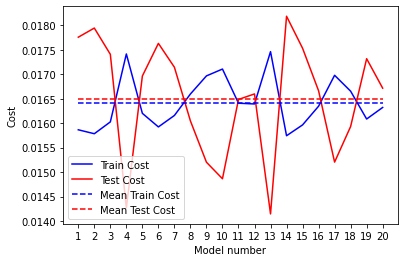

In [17]:
plt.figure()
plt.plot(list(train_cost_normal.keys()), list(train_cost_normal.values()), 'b-', label = 'Train Cost')
plt.plot(list(test_cost_normal.keys()), list(test_cost_normal.values()), 'r-', label = 'Test Cost')
plt.plot(list(train_cost_normal.keys()), [train_mean_cost_normal] * len(train_cost_normal), 'b--', label = 'Mean Train Cost')
plt.plot(list(test_cost_normal.keys()), [test_mean_cost_normal] * len(test_cost_normal), 'r--', label = 'Mean Test Cost')
plt.xlabel('Model number')
plt.ylabel('Cost')
plt.legend()
plt.xticks(list(train_cost_normal.keys()));

### Accuracy vs model number plot

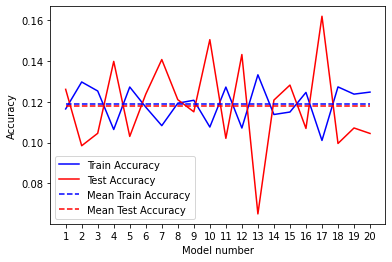

In [18]:
plt.figure()
plt.plot(list(train_accuracy_normal.keys()), list(train_accuracy_normal.values()), 'b-', label = 'Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), list(test_accuracy_normal.values()), 'r-', label = 'Test Accuracy')
plt.plot(list(train_accuracy_normal.keys()), [train_mean_accuracy_normal] * len(train_accuracy_normal), 'b--', label = 'Mean Train Accuracy')
plt.plot(list(test_accuracy_normal.keys()), [test_mean_accuracy_normal] * len(test_accuracy_normal), 'r--', label = 'Mean Test Accuracy')
plt.xlabel('Model number')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(list(train_accuracy_normal.keys()));

# Building Gradient Descent model
## Function for finding W using Gradient Descent

In [19]:
def gradient_descent(X, y, W, eta = 0.1, num_iterations = 1000, epsilon = 1e-10):
    print_space = num_iterations // 5 if num_iterations > 5 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, num_iterations + 1):
        dW = (1 / m) * (X.T @ (X @ W - y))
        W = W - (eta * dW)
        prediction = predict(W, X)
        cost = calculate_error(y, prediction)
        J[i] = cost
        acc = calculate_accuracy(y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} iterations is {cost}, accuracy = {acc}')
        if i != 1 and J[i-1] - J[i] < epsilon:
            break
    return W, J, accuracy

## Function for analyzing models

In [20]:
def analyze_cost_accuracy(train_cost_dict, test_cost_dict, train_acc_dict, test_acc_dict):
    
    train_costs = [list(x.values())[-1] for x in list(train_cost_dict.values())]
    test_costs = list(test_cost_dict.values())
    
    train_accuracies = [list(x.values())[-1] for x in list(train_acc_dict.values())]
    test_accuracies = list(test_acc_dict.values())

    train_mean_cost = np.mean(train_costs)
    train_var_cost = np.var(train_costs)
    train_max_cost = np.max(train_costs)
    train_min_cost = np.min(train_costs)

    test_mean_cost = np.mean(test_costs)
    test_var_cost = np.var(test_costs)
    test_max_cost = np.max(test_costs)
    test_min_cost = np.min(test_costs)
    
    train_mean_accuracy = np.mean(train_accuracies)
    train_var_accuracy = np.var(train_accuracies)
    train_max_accuracy = np.max(train_accuracies)
    train_min_accuracy = np.min(train_accuracies)

    test_mean_accuracy = np.mean(test_accuracies)
    test_var_accuracy = np.var(test_accuracies)
    test_max_accuracy = np.max(test_accuracies)
    test_min_accuracy = np.min(test_accuracies)
    
    best_model_number = np.argmin(test_costs) + 1

    print(f'Mean train cost = {train_mean_cost}')
    print(f'Variance train cost = {train_var_cost}')
    print(f'Max train cost = {train_max_cost}')
    print(f'Min train cost = {train_min_cost}')
    print()
    print(f'Mean test cost = {test_mean_cost}')
    print(f'Variance test cost = {test_var_cost}')
    print(f'Max test cost = {test_max_cost}')
    print(f'Min test cost = {test_min_cost}')
    print()
    print(f'Mean train accuracy = {train_mean_accuracy}')
    print(f'Variance train accuracy = {train_var_accuracy}')
    print(f'Max train accuracy = {train_max_accuracy}')
    print(f'Min train accuracy = {train_min_accuracy}')
    print()
    print(f'Mean test accuracy = {test_mean_accuracy}')
    print(f'Variance test accuracy = {test_var_accuracy}')
    print(f'Max test accuracy = {test_max_accuracy}')
    print(f'Min test accuracy = {test_min_accuracy}')
    print()
    print(f'Best model number is {best_model_number}')
    
    return best_model_number

## Function for generating and analyzing 20 models with different train-test split

In [21]:
def generate_gd_models(eta, num_iterations = 1000):
    temp_W_gd = {}
    temp_train_cost_gd = {}
    temp_train_accuracy_gd = {}
    temp_test_cost_gd = {}
    temp_test_accuracy_gd = {}

    for i in range(1, 21):
        print(f'Training model {i}')
        X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
        W_init = initialize_weights(X_train)
        temp_W_gd[i], temp_train_cost_gd[i], temp_train_accuracy_gd[i] = \
                                                                gradient_descent(X_train, Y_train, W_init, eta, num_iterations)
        predictions = predict(temp_W_gd[i], X_test)
        temp_test_cost_gd[i] = calculate_error(Y_test, predictions)
        temp_test_accuracy_gd[i] = calculate_accuracy(Y_test, predictions)
        print()
        print(f'Test Cost = {temp_test_cost_gd[i]}, test accuracy = {temp_test_accuracy_gd[i]}')
        print()
        
    best_model = analyze_cost_accuracy(temp_train_cost_gd, temp_test_cost_gd, temp_train_accuracy_gd, temp_test_accuracy_gd)
    
    return temp_W_gd[best_model], temp_train_cost_gd[best_model], temp_train_accuracy_gd[best_model], \
                                                                temp_test_cost_gd[best_model], temp_test_accuracy_gd[best_model]

## Applying Gradient Descent

In [22]:
# Initializing important variables
W_gd = {}
train_cost_gd = {}
train_accuracy_gd = {}
test_cost_gd = {}
test_accuracy_gd = {}

### Learning Rate = 0.001

In [23]:
eta = 0.001
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.0383021917144846, accuracy = -0.9827601842588192
Cost after 200 iterations is 0.029401917997558293, accuracy = -0.5220265404382962
Cost after 400 iterations is 0.024342353788523435, accuracy = -0.26011196024518535
Cost after 600 iterations is 0.021481070333031427, accuracy = -0.11199409394348714
Cost after 800 iterations is 0.019859154981842552, accuracy = -0.028033645816981423
Cost after 1000 iterations is 0.018936084670733554, accuracy = 0.019750227068971227

Test Cost = 0.0168354032551875, test accuracy = 0.018123031384542743

Training model 2
Cost after 1 iterations is 0.03553960638657992, accuracy = -0.9771552201199103
Cost after 200 iterations is 0.027292007880822068, accuracy = -0.5183211446454588
Cost after 400 iterations is 0.022608944384660636, accuracy = -0.2577908692993336
Cost after 600 iterations is 0.019963488751582832, accuracy = -0.11061770261759807
Cost after 800 iterations is 0.01846537060416384, accuracy = -0.02727372622

Cost after 1000 iterations is 0.01856695222202166, accuracy = 0.020582047093474

Test Cost = 0.017575107228691603, test accuracy = 0.022249443419608994

Training model 17
Cost after 1 iterations is 0.039069696559087326, accuracy = -1.0062430255751416
Cost after 200 iterations is 0.029901574000531853, accuracy = -0.535456621772324
Cost after 400 iterations is 0.024722543176494163, accuracy = -0.2695115189161934
Cost after 600 iterations is 0.021813159278197478, accuracy = -0.12011360521981174
Cost after 800 iterations is 0.020175854213428015, accuracy = -0.036037398946626276
Cost after 1000 iterations is 0.0192515941603095, accuracy = 0.011423688512355645

Test Cost = 0.01586989131469254, test accuracy = 0.05042053591071716

Training model 18
Cost after 1 iterations is 0.036135459210132545, accuracy = -1.0158378707978737
Cost after 200 iterations is 0.027511741253198174, accuracy = -0.5347586863995912
Cost after 400 iterations is 0.02263884251232526, accuracy = -0.2629211606802422
Cost 

### Learning Rate = 0.01

In [24]:
eta = 0.01
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.03817519535000891, accuracy = -0.9997165059721254
Cost after 200 iterations is 0.017775608366537795, accuracy = 0.06886717596708936
Cost after 400 iterations is 0.017613699402716763, accuracy = 0.07734839065241739
Cost after 600 iterations is 0.01753540914381397, accuracy = 0.08144943903080393
Cost after 800 iterations is 0.01747307351033303, accuracy = 0.08471474243106625
Cost after 1000 iterations is 0.017422765511026936, accuracy = 0.0873500069181885

Test Cost = 0.015465647306035656, test accuracy = 0.12148854447153856

Training model 2
Cost after 1 iterations is 0.03528465768090051, accuracy = -0.9827226526255912
Cost after 200 iterations is 0.01650859521581069, accuracy = 0.07234566384550634
Cost after 400 iterations is 0.016340500294630345, accuracy = 0.08179128780563305
Cost after 600 iterations is 0.016256587048492657, accuracy = 0.08650655797991624
Cost after 800 iterations is 0.016192240936976982, accuracy = 0.09012230775037688
C

Cost after 800 iterations is 0.017005967955523824, accuracy = 0.10636287635942332
Cost after 1000 iterations is 0.016932179418807442, accuracy = 0.1102403490138073

Test Cost = 0.016308647330646072, test accuracy = 0.08450860610892841

Training model 17
Cost after 1 iterations is 0.03705069893529882, accuracy = -0.9572429691580573
Cost after 200 iterations is 0.017540025739478347, accuracy = 0.07342929974423507
Cost after 400 iterations is 0.017346313494828278, accuracy = 0.08366235714332126
Cost after 600 iterations is 0.017244664239662064, accuracy = 0.08903208823372932
Cost after 800 iterations is 0.017165892916747073, accuracy = 0.09319326797870209
Cost after 1000 iterations is 0.017104156687011606, accuracy = 0.09645455062827035

Test Cost = 0.016017737855651616, test accuracy = 0.11290849030192085

Training model 18
Cost after 1 iterations is 0.038037882512712964, accuracy = -0.9532236798170914
Cost after 200 iterations is 0.01796663769464041, accuracy = 0.0774233507835953
Cost a

### Learning Rate = 0.1

In [25]:
eta = 0.1
W_gd[eta], train_cost_gd[eta], train_accuracy_gd[eta], test_cost_gd[eta], test_accuracy_gd[eta] = generate_gd_models(eta)

Training model 1
Cost after 1 iterations is 0.03212951713679649, accuracy = -0.7085001200579477
Cost after 200 iterations is 0.01650974080990531, accuracy = 0.12208782859220935
Cost after 400 iterations is 0.0163866506977518, accuracy = 0.12863319528716588
Cost after 600 iterations is 0.016348741800247635, accuracy = 0.13064901630499726
Cost after 800 iterations is 0.016334196193609762, accuracy = 0.13142248484426333
Cost after 1000 iterations is 0.016328442283782208, accuracy = 0.13172845133573985

Test Cost = 0.016708280949636122, test accuracy = 0.08932240591595364

Training model 2
Cost after 1 iterations is 0.03331439221922546, accuracy = -0.7184312916746833
Cost after 200 iterations is 0.017077751750699987, accuracy = 0.11909114815190647
Cost after 400 iterations is 0.016956759013347807, accuracy = 0.12533222571871783
Cost after 600 iterations is 0.016918524078868215, accuracy = 0.12730446964898368
Cost after 800 iterations is 0.016903749815882288, accuracy = 0.12806655936862732


Cost after 1000 iterations is 0.01564006811985513, accuracy = 0.10786764353552714

Test Cost = 0.018455525115356974, test accuracy = 0.1299615699407488

Training model 16
Cost after 1 iterations is 0.03399575970984046, accuracy = -0.7207266891842268
Cost after 200 iterations is 0.01778141282814913, accuracy = 0.09997741230232449
Cost after 400 iterations is 0.017684631046522056, accuracy = 0.10487611131931684
Cost after 600 iterations is 0.01765420895504274, accuracy = 0.10641595349951993
Cost after 800 iterations is 0.017642735120547506, accuracy = 0.10699671220036222
Cost after 1000 iterations is 0.01763829407012303, accuracy = 0.10722150005798425

Test Cost = 0.01371608891764079, test accuracy = 0.14328591082689135

Training model 17
Cost after 1 iterations is 0.03187927507277365, accuracy = -0.7225047924724466
Cost after 200 iterations is 0.01649709786888548, accuracy = 0.10862684059867267
Cost after 400 iterations is 0.016403302379753456, accuracy = 0.11369480965296874
Cost after 

## Finding best learning rate

In [26]:
best_eta_gd = min(test_cost_gd, key = test_cost_gd.get)
print(f'Best eta for GD is {best_eta_gd}')

Best eta for GD is 0.1


## Visualizing the results
### Cost vs iterations plot

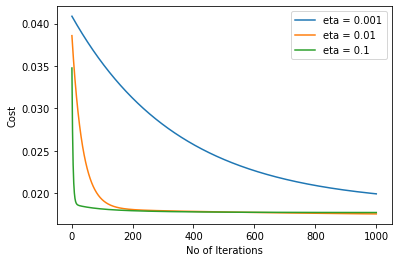

In [27]:
plt.figure()
for eta, error in train_cost_gd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'eta = {eta}')
plt.xlabel('No of Iterations')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs iterations plot

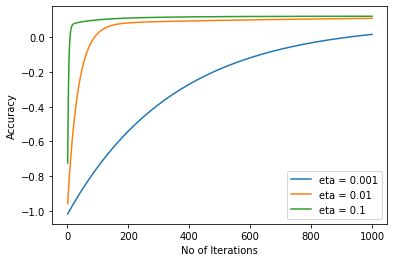

In [28]:
plt.figure()
for eta, accuracy in train_accuracy_gd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'eta = {eta}')
plt.xlabel('No of Iterations')
plt.ylabel('Accuracy')
plt.legend();

# Building Stochastic Gradient Descent model
## Function for finding W using Stochastic Gradient Descent

In [29]:
def stochastic_gradient_descent(X, Y, W, eta = 0.1, epochs = 1000):
    print_space = epochs // 5 if epochs > 5 else 1
    m = len(X)
    J = {}
    accuracy = {}
    for i in range(1, epochs + 1):
        m_array = np.array(list(range(m)))
        np.random.shuffle(m_array)
        for j in m_array:
            x = np.array(X[j]).reshape((1, len(W)))
            y = np.array(Y[j]).reshape((1, 1))
            dW = (1 / m) * x.T @ (x @ W - y)
            W = W - (eta * dW)
        prediction = predict(W, X)
        cost = calculate_error(Y, prediction)
        J[i] = cost
        acc = calculate_accuracy(Y, prediction)
        accuracy[i] = acc
        if i == 1 or i % print_space == 0:
            print(f'Cost after {i} epochs is {cost}, accuracy = {acc}')
    return W, J, accuracy

## Function for generating and analyzing 20 models with different train-test split

In [30]:
def generate_sgd_models(eta, epochs = 1000):
    temp_W_sgd = {}
    temp_train_cost_sgd = {}
    temp_train_accuracy_sgd = {}
    temp_test_cost_sgd = {}
    temp_test_accuracy_sgd = {}

    for i in range(1, 21):
        print(f'Training model {i}')
        X_train, Y_train, X_test, Y_test = shuffle(normal_df, ratio = 0.7, target = 'charges')
        W_init = initialize_weights(X_train)
        temp_W_sgd[i], temp_train_cost_sgd[i], temp_train_accuracy_sgd[i] = \
                                                            stochastic_gradient_descent(X_train, Y_train, W_init, eta, epochs)
        predictions = predict(temp_W_sgd[i], X_test)
        temp_test_cost_sgd[i] = calculate_error(Y_test, predictions)
        temp_test_accuracy_sgd[i] = calculate_accuracy(Y_test, predictions)
        print()
        print(f'Test Cost = {temp_test_cost_sgd[i]}, test accuracy = {temp_test_accuracy_sgd[i]}')
        print()
        
    best_model = analyze_cost_accuracy(temp_train_cost_sgd, temp_test_cost_sgd, temp_train_accuracy_sgd, temp_test_accuracy_sgd)
    
    return temp_W_sgd[best_model], temp_train_cost_sgd[best_model], temp_train_accuracy_sgd[best_model], \
                                                            temp_test_cost_sgd[best_model], temp_test_accuracy_sgd[best_model]

## Applying Stochastic Gradient Descent

In [31]:
# Initializing important variables
W_sgd = {}
train_cost_sgd = {}
train_accuracy_sgd = {}
test_cost_sgd = {}
test_accuracy_sgd = {}

### Learning Rate = 0.001

In [32]:
eta = 0.001
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.035444262980118504, accuracy = -1.0179703479449032
Cost after 200 epochs is 0.027126229055571216, accuracy = -0.5443945305452977
Cost after 400 epochs is 0.022411044994249955, accuracy = -0.27594201324550327
Cost after 600 epochs is 0.019752798893412322, accuracy = -0.12459842875513205
Cost after 800 epochs is 0.01825132931582047, accuracy = -0.03911432410267346
Cost after 1000 epochs is 0.017400484953973495, accuracy = 0.009327329032740694

Test Cost = 0.02134246746713541, test accuracy = -0.008180900647757339

Training model 2
Cost after 1 epochs is 0.03874886121438363, accuracy = -1.0348691202455935
Cost after 200 epochs is 0.02952801435252399, accuracy = -0.5506428500101539
Cost after 400 epochs is 0.024312510663336222, accuracy = -0.2767543518440285
Cost after 600 epochs is 0.02137881897305901, accuracy = -0.12269360162383247
Cost after 800 epochs is 0.01972565021089317, accuracy = -0.03587860992448433
Cost after 1000 epochs is 0.018791172

Cost after 1000 epochs is 0.018188983602837445, accuracy = 0.01483783750194445

Test Cost = 0.018446741678091995, test accuracy = 0.03470061513794842

Training model 16
Cost after 1 epochs is 0.03897112533532035, accuracy = -0.9696876691964849
Cost after 200 epochs is 0.029902329996171453, accuracy = -0.5113305085989488
Cost after 400 epochs is 0.024759205709845244, accuracy = -0.25138552623683164
Cost after 600 epochs is 0.02185678778823935, accuracy = -0.10469084544811169
Cost after 800 epochs is 0.020214245720894922, accuracy = -0.021673102738675176
Cost after 1000 epochs is 0.0192802144943504, accuracy = 0.02553492047695949

Test Cost = 0.01582324323016877, test accuracy = 0.013441235291066111

Training model 17
Cost after 1 epochs is 0.038099697530843524, accuracy = -1.046101650336304
Cost after 200 epochs is 0.028989385447334554, accuracy = -0.5568425276344509
Cost after 400 epochs is 0.023848236215692896, accuracy = -0.28074285731629844
Cost after 600 epochs is 0.020963149120792

### Learning Rate = 0.01

In [33]:
eta = 0.01
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.036193113731825786, accuracy = -0.9394184094283013
Cost after 200 epochs is 0.017149914886160418, accuracy = 0.0810168780504611
Cost after 400 epochs is 0.01693314805071564, accuracy = 0.09263239127571443
Cost after 600 epochs is 0.01681508980352888, accuracy = 0.09895857640792927
Cost after 800 epochs is 0.01672451078385626, accuracy = 0.10381227923003755
Cost after 1000 epochs is 0.01665426060974319, accuracy = 0.10757665501571712

Test Cost = 0.016987281836878237, test accuracy = 0.0881713212732187

Training model 2
Cost after 1 epochs is 0.03517832675093935, accuracy = -0.9266943963234402
Cost after 200 epochs is 0.016557637482611784, accuracy = 0.09314881347359061
Cost after 400 epochs is 0.016285623292189213, accuracy = 0.1080468562406085
Cost after 600 epochs is 0.016126660672799435, accuracy = 0.11675313696201894
Cost after 800 epochs is 0.016006598201824717, accuracy = 0.12332888150136256
Cost after 1000 epochs is 0.015915213807294173,

Cost after 200 epochs is 0.01677469637511061, accuracy = 0.06263771998442558
Cost after 400 epochs is 0.01663481640848512, accuracy = 0.07045414786559534
Cost after 600 epochs is 0.016573052688965712, accuracy = 0.0739054759645561
Cost after 800 epochs is 0.016524940106487692, accuracy = 0.07659398483533064
Cost after 1000 epochs is 0.016486935039108256, accuracy = 0.07871769043418675

Test Cost = 0.017763943537231458, test accuracy = 0.1322764697984955

Training model 17
Cost after 1 epochs is 0.03797307947391831, accuracy = -0.9768706516883678
Cost after 200 epochs is 0.017726316735636165, accuracy = 0.07717162256275756
Cost after 400 epochs is 0.01751851296049885, accuracy = 0.0879898440520408
Cost after 600 epochs is 0.01740637221584833, accuracy = 0.09382786798977183
Cost after 800 epochs is 0.017319212958088658, accuracy = 0.09836536089461723
Cost after 1000 epochs is 0.01725069998668153, accuracy = 0.10193213199433127

Test Cost = 0.015595783688088852, test accuracy = 0.10240949

### Learning Rate = 0.1

In [34]:
eta = 0.1
W_sgd[eta], train_cost_sgd[eta], train_accuracy_sgd[eta], test_cost_sgd[eta], test_accuracy_sgd[eta] = generate_sgd_models(eta)

Training model 1
Cost after 1 epochs is 0.030461411012023043, accuracy = -0.7608163508085428
Cost after 200 epochs is 0.015566233151865564, accuracy = 0.10019670974911465
Cost after 400 epochs is 0.01548075612582834, accuracy = 0.10513769377002635
Cost after 600 epochs is 0.015453539067559094, accuracy = 0.10671097089768411
Cost after 800 epochs is 0.015442960033457534, accuracy = 0.10732249004938843
Cost after 1000 epochs is 0.015438723750750987, accuracy = 0.10756736760458085

Test Cost = 0.01890716071744327, test accuracy = 0.1326946947981149

Training model 2
Cost after 1 epochs is 0.03296068887457159, accuracy = -0.7169272917106329
Cost after 200 epochs is 0.016952559788331302, accuracy = 0.11693858475764174
Cost after 400 epochs is 0.01685701538376508, accuracy = 0.12191550730905543
Cost after 600 epochs is 0.016829960280706498, accuracy = 0.12332481173828302
Cost after 800 epochs is 0.016819615743818253, accuracy = 0.12386366023659934
Cost after 1000 epochs is 0.0168154757938316

Cost after 200 epochs is 0.016676652064092815, accuracy = 0.11383734103535603
Cost after 400 epochs is 0.01656375997968288, accuracy = 0.1198361919625257
Cost after 600 epochs is 0.01652908552786742, accuracy = 0.1216787203249835
Cost after 800 epochs is 0.016516088093191817, accuracy = 0.12236937701240391
Cost after 1000 epochs is 0.016511067933114233, accuracy = 0.1226361378937657

Test Cost = 0.016239045964949936, test accuracy = 0.1133277957700819

Training model 17
Cost after 1 epochs is 0.03290306022122346, accuracy = -0.7347471403834538
Cost after 200 epochs is 0.01683833518455931, accuracy = 0.11223291651787237
Cost after 400 epochs is 0.016746839696351046, accuracy = 0.11705683062981564
Cost after 600 epochs is 0.016720773392093373, accuracy = 0.11843112367329967
Cost after 800 epochs is 0.01671117811387293, accuracy = 0.11893701526338829
Cost after 1000 epochs is 0.01670750689862509, accuracy = 0.11913057264407267

Test Cost = 0.015830530686611968, test accuracy = 0.118839854

## Finding best learning rate

In [35]:
best_eta_sgd = min(test_cost_sgd, key = test_cost_sgd.get)
print(f'Best eta for SGD is {best_eta_sgd}')

Best eta for SGD is 0.001


## Visualizing the results
### Cost vs epochs plot

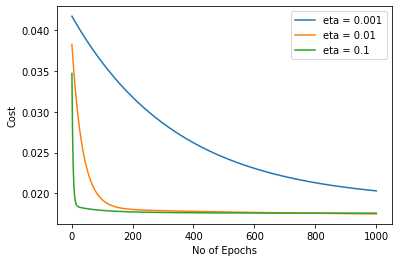

In [36]:
plt.figure()
for eta, error in train_cost_sgd.items():
    plt.plot(list(error.keys()), list(error.values()), label = f'eta = {eta}')
plt.xlabel('No of Epochs')
plt.ylabel('Cost')
plt.legend();

### Accuracy vs epochs plot

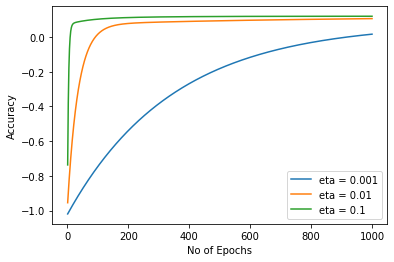

In [37]:
plt.figure()
for eta, accuracy in train_accuracy_sgd.items():
    plt.plot(list(accuracy.keys()), list(accuracy.values()), label = f'eta = {eta}')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend();

# Comparison between GD and SGD
## Cost comparison

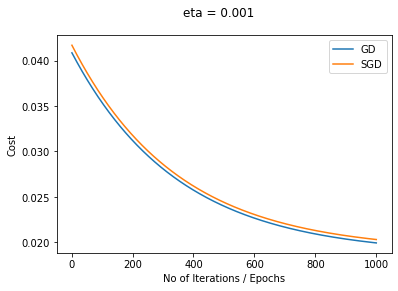

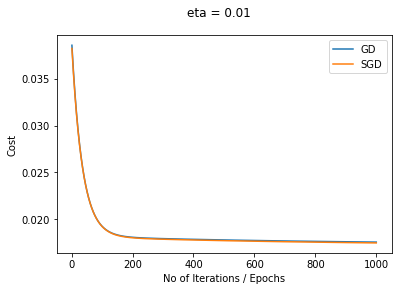

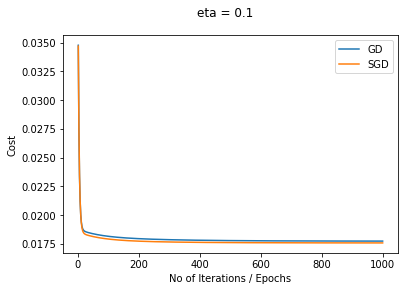

In [38]:
for eta in [0.001, 0.01, 0.1]:
    plt.figure().suptitle(f'eta = {eta}')
    plt.plot(list(train_cost_gd[eta].keys()), list(train_cost_gd[eta].values()), label = 'GD')
    plt.plot(list(train_cost_sgd[eta].keys()), list(train_cost_sgd[eta].values()), label = 'SGD')
    plt.xlabel('No of Iterations / Epochs')
    plt.ylabel('Cost')
    plt.legend();

## Accuracy comparison

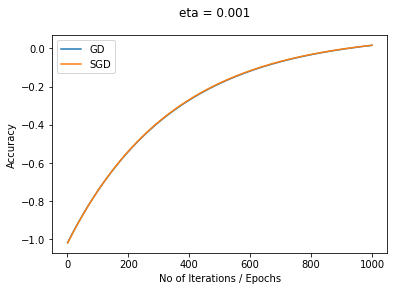

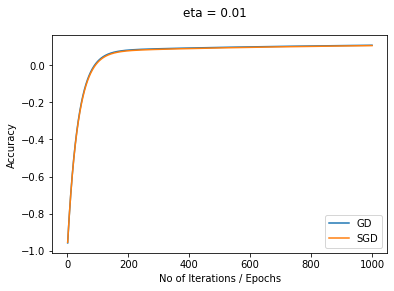

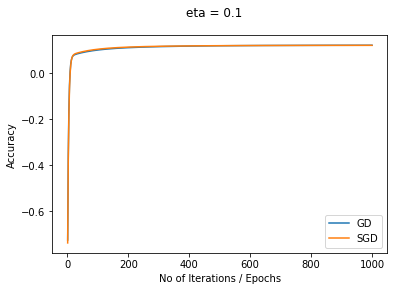

In [39]:
for eta in [0.001, 0.01, 0.1]:
    plt.figure().suptitle(f'eta = {eta}')
    plt.plot(list(train_accuracy_gd[eta].keys()), list(train_accuracy_gd[eta].values()), label = 'GD')
    plt.plot(list(train_accuracy_sgd[eta].keys()), list(train_accuracy_sgd[eta].values()), label = 'SGD')
    plt.xlabel('No of Iterations / Epochs')
    plt.ylabel('Accuracy')
    plt.legend();

# Predicting the output

In [40]:
# Getting input from user
age = float(input('Enter Age: '))
bmi = float(input('Enter BMI: '))
children = int(input('Enter no of children: '))

# Normalizing the input
age_normalized = normalize(age, 'age')
bmi_normalized = normalize(bmi, 'bmi')
children_normalized = normalize(children, 'children')

# Generating X vector
X = np.array([1, age_normalized, bmi_normalized, children_normalized])

# Calculating normalized result using normal equations weights
charge_normalized = predict(W_normal[best_normal_model], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using normal equations is {charge}')

# Calculating normalized result using gradient descent weights
charge_normalized = predict(W_gd[best_eta_gd], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using GD is {charge}')

# Calculating normalized result using normal equations weights
charge_normalized = predict(W_sgd[best_eta_sgd], X)[0]

# Denormalizing the result
charge = denormalize(charge_normalized, 'charges')

# Printing the result
print(f'Predicted charge using SGD is {charge}')

Enter Age: 33
Enter BMI: 22.705
Enter no of children: 0
Predicted charge using normal equations is 8153.481370794989
Predicted charge using GD is 9203.327934616183
Predicted charge using SGD is 9620.333117241576
